## Dự đoán điểm thi

**Hiển thị bảng điểm**

(1286, 909)


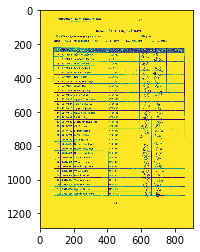

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

X = np.array(Image.open('./bangdiem.png'))
plt.imshow(X)
print(X.shape)

**Hiển thị dữ liệu điểm đã được tiền xử lý**

(26, 20)


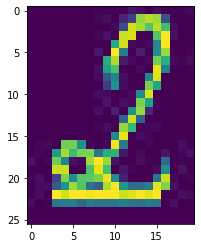

In [5]:
Y = np.array(Image.open('./image/1a.jpg'))
plt.imshow(Y)
print(Y.shape)

**Chuyển ảnh tiền xử lý về dữ liệu chuẩn**

In [6]:
mypath = "./image/"
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [8]:
import tensorflow as tf
model = tf.keras.models.load_model('model.h')

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [10]:
import numpy as np
from keras.preprocessing import image
output = {}
for file in onlyfiles:
    img_test = image.load_img(mypath + file, target_size=(28, 28)) 
    x = image.img_to_array(img_test)
    x = np.expand_dims(x, axis=0) 
    images = np.vstack([x])
    gray = rgb2gray(images)
    gray_norm = gray.reshape(1,28,28,1)
    pre = np.argmax(model.predict(gray_norm))
    output[file] = pre

Using TensorFlow backend.


**Kết qủa**

In [12]:
output

{'10a.jpg': 6,
 '10b.jpg': 5,
 '12a.jpg': 2,
 '12b.jpg': 2,
 '13a.jpg': 3,
 '13b.jpg': 5,
 '14a.jpg': 4,
 '14b.jpg': 0,
 '15a.jpg': 4,
 '15b.jpg': 0,
 '16a.jpg': 5,
 '16b.jpg': 0,
 '17a.jpg': 5,
 '17b.jpg': 0,
 '18a.jpg': 3,
 '18b.jpg': 0,
 '19a.jpg': 5,
 '19b.jpg': 5,
 '1a.jpg': 2,
 '1b.jpg': 0,
 '21a.jpg': 2,
 '21b.jpg': 6,
 '22a.jpg': 6,
 '22b.jpg': 5,
 '23a.jpg': 5,
 '23b.jpg': 5,
 '24a.jpg': 3,
 '24b.jpg': 0,
 '25a.jpg': 4,
 '25b.jpg': 2,
 '26a.jpg': 5,
 '26b.jpg': 2,
 '27a.jpg': 2,
 '27b.jpg': 0,
 '28a.jpg': 6,
 '28b.jpg': 0,
 '29a.jpg': 5,
 '29b.jpg': 5,
 '2a.jpg': 5,
 '2b.jpg': 5,
 '30a.jpg': 2,
 '30b.jpg': 5,
 '31a.jpg': 5,
 '31b.jpg': 0,
 '32a.jpg': 8,
 '32b.jpg': 6,
 '33a.jpg': 4,
 '33b.jpg': 0,
 '34a.jpg': 6,
 '34b.jpg': 0,
 '35a.jpg': 3,
 '35b.jpg': 5,
 '36a.jpg': 6,
 '36b.jpg': 5,
 '37a.jpg': 3,
 '37b.jpg': 5,
 '38a.jpg': 2,
 '38b.jpg': 2,
 '39a.jpg': 5,
 '39b.jpg': 5,
 '3a.jpg': 2,
 '3b.jpg': 5,
 '40a.jpg': 2,
 '40b.jpg': 5,
 '41a.jpg': 2,
 '41b.jpg': 5,
 '42a.jpg': 5,
 

**Đưa điểm thi về dạng chuẩn**

In [14]:
result = {}
for key in output.keys():
    if key[-5]=='a':
        result[int(key[:-5])] = output[key] + output[key[:-5]+'b.jpg']*10**(-1)
result

{10: 6.5,
 12: 2.2,
 13: 3.5,
 14: 4.0,
 15: 4.0,
 16: 5.0,
 17: 5.0,
 18: 3.0,
 19: 5.5,
 1: 2.0,
 21: 2.6,
 22: 6.5,
 23: 5.5,
 24: 3.0,
 25: 4.2,
 26: 5.2,
 27: 2.0,
 28: 6.0,
 29: 5.5,
 2: 5.5,
 30: 2.5,
 31: 5.0,
 32: 8.6,
 33: 4.0,
 34: 6.0,
 35: 3.5,
 36: 6.5,
 37: 3.5,
 38: 2.2,
 39: 5.5,
 3: 2.5,
 40: 2.5,
 41: 2.5,
 42: 5.0,
 43: 7.5,
 44: 8.5,
 45: 2.0,
 46: 4.5,
 4: 2.5,
 5: 5.5,
 6: 5.0,
 7: 2.0,
 8: 3.5,
 9: 3.0}

**Sắp xếp lại danh sách và đưa ra những thí sinh không có điểm**

In [15]:
lst = [0.0]*(np.max(list(result.keys()))+1)
print("Bảng điểm có :",len(np.array(lst))-1,"sinh viên")
for i in range(1, np.max(list(result.keys()))+1):
    try:
        lst[i] = result[i]
    except:
        print("Sinh viên số {} không có điểm".format(i))
        print("Đưa về 0 điểm!")
del(lst[0])
lst 

Bảng điểm có : 46 sinh viên
Sinh viên số 11 không có điểm
Đưa về 0 điểm!
Sinh viên số 20 không có điểm
Đưa về 0 điểm!


[2.0,
 5.5,
 2.5,
 2.5,
 5.5,
 5.0,
 2.0,
 3.5,
 3.0,
 6.5,
 0.0,
 2.2,
 3.5,
 4.0,
 4.0,
 5.0,
 5.0,
 3.0,
 5.5,
 0.0,
 2.6,
 6.5,
 5.5,
 3.0,
 4.2,
 5.2,
 2.0,
 6.0,
 5.5,
 2.5,
 5.0,
 8.6,
 4.0,
 6.0,
 3.5,
 6.5,
 3.5,
 2.2,
 5.5,
 2.5,
 2.5,
 5.0,
 7.5,
 8.5,
 2.0,
 4.5]

In [18]:
print(len(lst))

46


In [19]:
diemthi = dict()
for i in range(1,len(lst)):
    diemthi[i] = lst[i]
print(diemthi)

{1: 5.5, 2: 2.5, 3: 2.5, 4: 5.5, 5: 5.0, 6: 2.0, 7: 3.5, 8: 3.0, 9: 6.5, 10: 0.0, 11: 2.2, 12: 3.5, 13: 4.0, 14: 4.0, 15: 5.0, 16: 5.0, 17: 3.0, 18: 5.5, 19: 0.0, 20: 2.6, 21: 6.5, 22: 5.5, 23: 3.0, 24: 4.2, 25: 5.2, 26: 2.0, 27: 6.0, 28: 5.5, 29: 2.5, 30: 5.0, 31: 8.6, 32: 4.0, 33: 6.0, 34: 3.5, 35: 6.5, 36: 3.5, 37: 2.2, 38: 5.5, 39: 2.5, 40: 2.5, 41: 5.0, 42: 7.5, 43: 8.5, 44: 2.0, 45: 4.5}


**Lưu vào file txt**

In [41]:
with open('bangdiempredict.txt', 'w') as f:
    for key,value in diemthi.items():
        f.write("%s\n" % key)
        f.write("%s\n" % value)